<a href="https://colab.research.google.com/github/100495790/p1_llamadas_2024/blob/main/An%C3%A1lisis_del_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# PRIMERA PRÁCTICA
### PREDICCIÓN DEL ABANDONO (BURNOUT) DE EMPLEADOS
##### Aprendizaje Automático · Grado en Ingeniería Informática · Curso 2024/25


# Autores

Vicente Almazan Rogado - 100495909 - 100495909@alumnos.uc3m.es

Javier Esteve Martín - 100495790 - 100495790@alumnos.uc3m.es

\

---



## 1. Análisis de datos exploratorio (EDA)

---

\



## 1.1. Importación de los datos

En esta sección haremos el EDA simplificado, es decir, analizaremos el conjunto de datos dado. Tras la elección entre la suma de los dos últimos dígitos de nuestros NIA's (0+9 o 9+0), será el conjunto de datos número 9.


Para empezar, importaremos las librerías que necesitaremos para la práctica.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

Entonces subimos a Google Colab el fichero *attrition_availabledata_09.csv*. Este archivo tiene los datos de entrenamiento, que están almacenados en celdas y separados por comas.

Luego mediante la librería pandas, los procesamos para obtenerlos en un formato que se pueda manipular de manera que sea más fácil analizar los datos. Lo que nos permite además ordenarlos en una tabla permitiéndonos interpretar los datos con mayor facilidad.  

En la librería también se establece que aquellas celdas o valores vacíos que se encuentren, son los NaN_Values.

In [10]:
df = pd.read_csv("attrition_availabledata_09.csv.gz", compression="gzip", sep=",", na_values=[''])
display(df)

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.434015,8,3,3,4.0,2.0,3.0,25,Travel_Rarely,Research & Development,...,Y,11,8,1,4.0,3,3,1,2,No
1,6.572103,15,4,3,3.0,3.0,3.0,18,Non-Travel,Research & Development,...,Y,18,8,0,0.0,5,0,0,0,Yes
2,8.075888,4,3,3,1.0,4.0,3.0,33,Travel_Frequently,Sales,...,Y,14,8,1,15.0,2,15,8,12,No
3,8.694279,6,3,3,4.0,3.0,2.0,37,Travel_Rarely,Sales,...,Y,14,8,0,17.0,3,3,1,0,No
4,6.646379,9,3,4,1.0,4.0,3.0,56,Travel_Rarely,Human Resources,...,Y,21,8,0,5.0,3,4,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,5.622518,16,2,4,1.0,2.0,2.0,50,Travel_Rarely,Sales,...,Y,23,8,0,28.0,2,10,1,6,No
2936,9.553096,4,3,3,4.0,2.0,3.0,41,Travel_Rarely,Research & Development,...,Y,19,8,2,8.0,0,5,1,2,No
2937,6.734752,19,1,3,2.0,2.0,4.0,40,Travel_Rarely,Research & Development,...,Y,12,8,0,7.0,2,5,1,3,No
2938,8.035525,14,2,3,3.0,4.0,3.0,44,Travel_Rarely,Research & Development,...,Y,12,8,0,8.0,2,2,2,2,No



## 1.2. Primera exploración de los datos

In [11]:
print(df.shape)

(2940, 31)


In [12]:
df.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2923.000000,2928.000000,2911.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2930.000000,2940.000000,2940.0,2940.000000,2935.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.315173,12.806122,2.725850,3.153741,2.733151,2.719262,2.750601,37.005442,9.230272,2.920748,...,65860.955782,2.688055,15.197619,8.0,0.798299,11.390119,2.805442,7.066667,2.258163,4.140816
std,1.324823,5.481494,0.713224,0.360762,1.084686,1.103344,0.705145,9.186990,8.113249,1.024792,...,47453.158802,2.515835,3.646986,0.0,0.861523,7.883964,1.291571,6.143319,3.297387,3.618114
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.292840,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29360.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,7.019177,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,...,50045.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.901329,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,85780.000000,4.000000,18.000000,8.0,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000
max,10.907255,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,37.000000,15.000000,17.000000


In [13]:
print("El número de variables es", len(df.keys()))

for variable in datos:
  print(variable)

El número de variables es 31
hrs
absences
JobInvolvement
PerformanceRating
EnvironmentSatisfaction
JobSatisfaction
WorkLifeBalance
Age
BusinessTravel
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeID
Gender
JobLevel
JobRole
MaritalStatus
MonthlyIncome
NumCompaniesWorked
Over18
PercentSalaryHike
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsSinceLastPromotion
YearsWithCurrManager
Attrition


In [14]:
nan_counts = df.isna().sum()


df_nan = df[df.isna().any(axis=1)]
display(df_nan)

print(nan_counts[nan_counts > 0])

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
5,6.938033,10,3,4,4.0,1.0,NaN,50,Travel_Frequently,Research & Development,...,Y,24,8,1,32.0,2,2,2,2,No
61,7.073958,11,2,3,1.0,4.0,3.0,40,Travel_Rarely,Research & Development,...,Y,14,8,1,9.0,4,9,4,7,No
76,9.131313,5,3,3,1.0,4.0,NaN,46,Travel_Frequently,Research & Development,...,Y,14,8,1,14.0,2,9,0,8,No
100,6.611891,11,3,3,4.0,4.0,2.0,29,Travel_Rarely,Research & Development,...,Y,16,8,1,9.0,2,7,1,7,No
165,5.984555,12,1,3,4.0,1.0,3.0,56,Travel_Rarely,Research & Development,...,Y,15,8,0,28.0,3,5,4,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,5.810454,19,3,3,3.0,1.0,NaN,41,Travel_Rarely,Research & Development,...,Y,19,8,0,5.0,2,5,0,4,No
2600,5.961054,17,2,3,3.0,2.0,NaN,54,Travel_Rarely,Research & Development,...,Y,19,8,1,16.0,4,9,7,1,No
2728,9.400915,3,2,3,4.0,NaN,3.0,42,Travel_Rarely,Sales,...,Y,14,8,1,10.0,2,9,7,8,No
2791,7.115717,22,1,3,NaN,4.0,3.0,32,Travel_Frequently,Sales,...,Y,19,8,0,10.0,3,10,4,7,No


EnvironmentSatisfaction    17
JobSatisfaction            12
WorkLifeBalance            29
NumCompaniesWorked         10
TotalWorkingYears           5
dtype: int64


<Axes: xlabel='Age'>

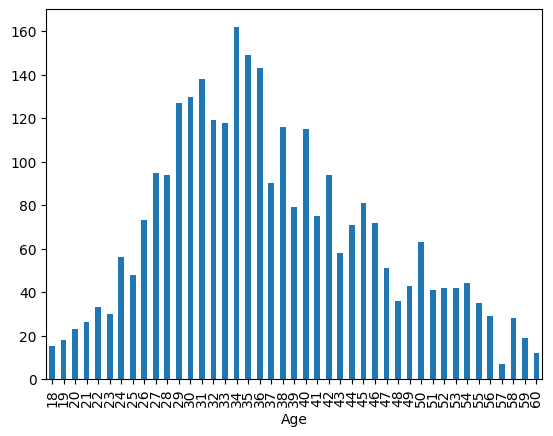

In [15]:
df['Age'].value_counts().sort_index().plot(kind='bar')


\
Vicenn ha dicho el profe que las variables employee count y employee id no son útiles porque y probablemente las tendremos que borrar al igual que la de las horas que es constante porque no nos sirven para entrenar. Ponlo luego en el eda

\

## 1.3. Análisis de las variables

# 2. Carga de datos en el modelo

En primer lugar hacemos los imports necesarios y carcagmos el dataset en el modelo. Asignando a la variable X todas las columnas de la tabla excepto *Attrition* (que es lo que queremos predecir) y asignando a la variable y la columna *Attrition*. También comprobamos las dimensiones de X e y.

\

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X=df.drop(columns=["Attrition"])
y=df['Attrition']

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (2940, 30)
Dimensiones de y: (2940,)


Tras esto dividimos el modelo en train y test, la parte de train se usará para decidir el mejor modelo y después entrenarlo; y la parte de test se usará para predecir el rendimiento del modelo. Una vez hecho todo esto se usarán ambos para entrenar el modelo de competición.

En este caso dividimos el train y test en 2/3 y 1/3 respectivamente.

\

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

# 3. Selección del modelo